# Introduction

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. This year, they amassed more than 64,000 responses fielded from 213 countries.

**Data** survey_results_public.csv- CSV file with main survey results, one respondent per row and one column per answer 

In this project, I will follow the CRISP-DM process (Cross Industry Process for Data Mining). CRISP-DM stands for:
- Business understanding
- Data understanding
- Data preparation
- Modeling
- Evaluation
- Deployment

# Business understanding¶

# In this project , I will focus to find out:
- Most countries think about Education is Important ?
- Which most famous language in professional developer?
- Python vs R language 
- How many different average salary if you write r and python  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('survey_results_public.csv') 
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data understanding

In [3]:
df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 154 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Respondent                        int64  
 1   Professional                      object 
 2   ProgramHobby                      object 
 3   Country                           object 
 4   University                        object 
 5   EmploymentStatus                  object 
 6   FormalEducation                   object 
 7   MajorUndergrad                    object 
 8   HomeRemote                        object 
 9   CompanySize                       object 
 10  CompanyType                       object 
 11  YearsProgram                      object 
 12  YearsCodedJob                     object 
 13  YearsCodedJobPast                 object 
 14  DeveloperType                     object 
 15  WebDeveloperType                  object 
 16  MobileDeveloperType               objec

# Data preparation

In [4]:
#create new column r user  and python user 
df['r_user'] = df['HaveWorkedLanguage'].apply(lambda x: 'R' in str(x).split('; '))
df['python_user'] = df['HaveWorkedLanguage'].apply(lambda x: 'Python' in str(x).split('; '))

In [5]:
df.isnull().sum()   #check column to use is missing data 

Respondent               0
Professional             0
ProgramHobby             0
Country                  0
University               0
                     ...  
InterestedAnswers    16780
Salary               38501
ExpectedSalary       48826
r_user                   0
python_user              0
Length: 156, dtype: int64

In [6]:
#drop null value in column to use 
df_new = df[['Country','ProblemSolving','BuildingThings','LearningNewTech','InvestTimeTools','EducationImportant','HaveWorkedLanguage','r_user','python_user',"Salary"]].dropna()

# Analyze, Model, and Visualize
- Provide a clear connection between your business questions and how the data answers them.

### Question 1:
Which countries most survey result?

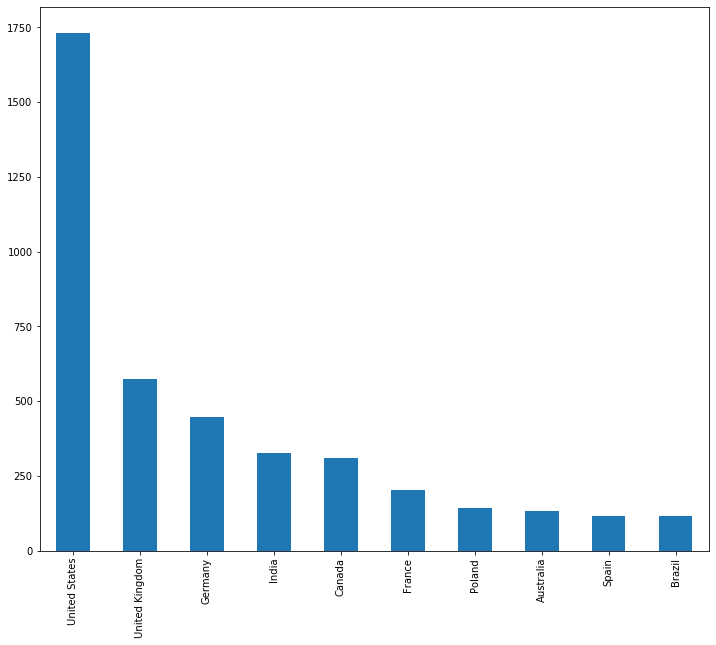

In [7]:
df_new['Country'].value_counts()[0:10].plot(kind='bar',figsize=(12,10))

The USA the largest result survey because united states have more career realated technology industry and statsup.Second is United Kingdom and Third is Germany.   

### Question 2:
Most countries think about Education is Important ?

(array([12.,  0., 66.,  0.,  0., 21.,  0.,  2.,  0.,  8.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

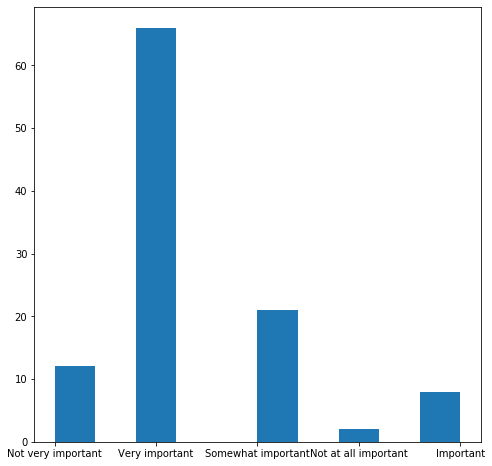

In [8]:
# Group by category

countries = df_new.groupby("Country")


max_cou = countries['EducationImportant'].max()

plt.figure(figsize=(8,8))
plt.hist(max_cou)

Most countries think about Education is very important. It true If you be a professional programmer, coding is important and some education such as time management, business or marketing which is the basic subject must learn. 

### Question 3:
Python vs R language

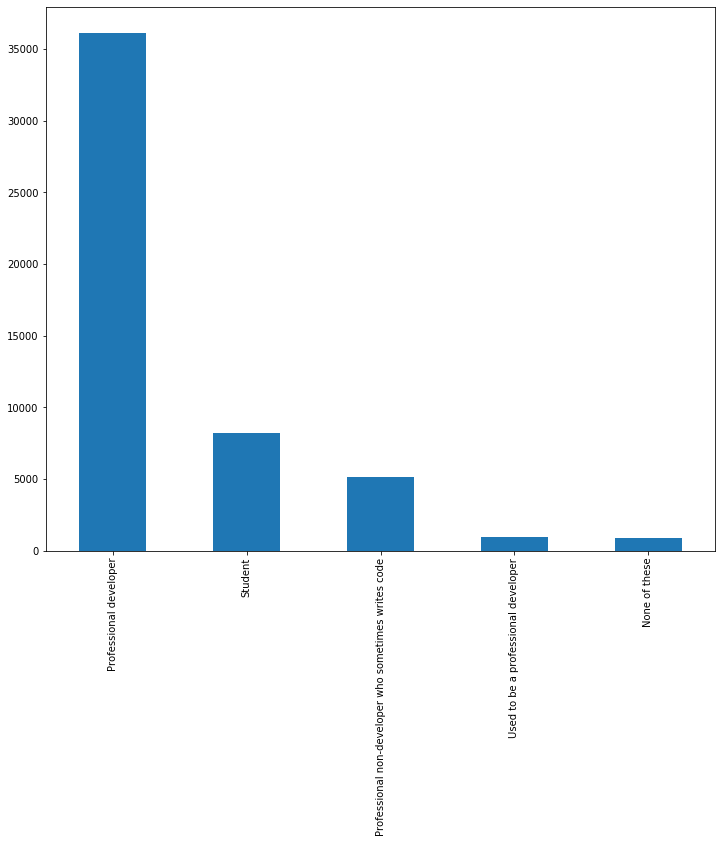

In [9]:
# ALL kinf Professional 
df['Professional'].value_counts().plot(kind='bar',figsize=(12,10))

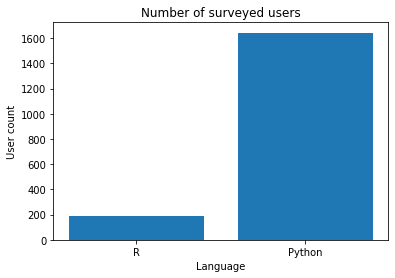

In [10]:
fig, ax = plt.subplots()
plt.xlabel('Language')
plt.ylabel('User count')
plt.title('Number of surveyed users')
plt.bar([0, 1], [df_new['r_user'].sum(), df_new['python_user'].sum()])
ax.set_xticks([0, 1])
ax.set_xticklabels(('R', 'Python'))
print()

### Question 4:
How many different average salary if you write r and python

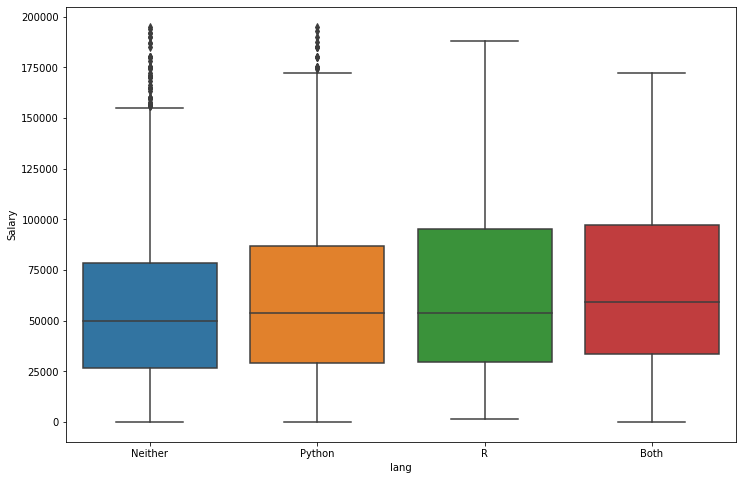

In [11]:
def langs(row):
    row = [int(i) for i in row.values]
    if sum(row) == 2: return 'Both'
    elif row[0] == 1: return 'R'
    elif row[1] == 1: return 'Python'
    else: return 'Neither'
    
order = ['Neither', 'Python', 'R', 'Both']    

df_new['lang'] = df_new[['r_user', 'python_user']].apply(langs, axis=1)

plt.figure(figsize=(12, 8))
sns.boxplot(x="lang", y="Salary", data=df_new ,order=order)

Average, R users make quite a bit more than Python users